In [1]:
%load_ext autoreload
%autoreload 2

import multiprocessing as mp
import torch
import wandb_util.wandb_util as wbu
from scripts.wandb_experiments.comparison_exp import multidim_sweep_exp

torch.set_grad_enabled(False)
mp.set_start_method("spawn", force=True)

In [3]:
from scripts.wandb_experiments.comparison_exp import MultiDimSweepConfig
from scripts.wandb_runs.run_grtex import RunGrTexConfig, run_gr_tex
from text3d2video.pipelines.generative_rendering_pipeline import (
    GenerativeRenderingConfig,
)
from text3d2video.pipelines.pipeline_utils import ModelConfig
from omegaconf import OmegaConf

from text3d2video.utilities.omegaconf_util import get_import_path

prompt = "Lion"
extr_tag = "lion_zoom_out_srclatest_Lion_0:v0"
tgt_tag = "lion_zoom:latest"

# prompt = "Stormtrooper"
# extr_tag = 'rumba_zoom_out_srclatest_Stormtrooper_0:v0'
# tgt_tag = 'rumba_zoom_20:latest'

base_config = OmegaConf.structured(
    RunGrTexConfig(
        prompt=prompt,
        animation_tag=tgt_tag,
        extr_tag=extr_tag,
        generative_rendering=GenerativeRenderingConfig(feature_blend_alpha=0.7),
        model=ModelConfig(),
        seed=0,
    )
)


ts = [0.1, 0.3, 0.6, 0.8]
no_texture = {'do_texture_noise_init': False}
with_texture = [{'start_noise_level': t} for t in ts]

override_dims = [[no_texture] + with_texture]
override_dim_labels = [["No Texture"] + [f"t={t:.1f}" for t in ts]]

sweep_config = OmegaConf.structured(MultiDimSweepConfig(
    fun_path=get_import_path(run_gr_tex),
    base_config=base_config,
    override_dims=override_dims,
    override_dim_labels=override_dim_labels,
))

spec = multidim_sweep_exp(sweep_config)
spec

[No Texture([]), t=0.1([]), t=0.3([]), t=0.6([]), t=0.8([])]

In [4]:
wbu.sync_experiment(multidim_sweep_exp, sweep_config, "noise_init_ablation_lion")

Experiment: https://wandb.ai/romeu/diffusion-3D-features/groups/noise_init_ablation_lion/workspace

Would execute 3 new runs:
- t=0.3
- t=0.6
- exp

Would delete 2 outdated runs:
- t=0.3                          (08o9ujso)
- t=0.6                          (a66mnn05)

Do you want to continue? (y/n)
Deleting 2 runs
Executing 3 runs


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250528_003902-zdjxcepn
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run t=0.3
wandb: ⭐️ View project at https://wandb.ai/romeu/diffusion-3D-features
wandb: 🚀 View run at https://wandb.ai/romeu/diffusion-3D-features/runs/zdjxcepn
wandb:   4 of 4 files downloaded.  
wandb: Downloading large artifact lion_zoom_out_srclatest_Lion_0:v0, 52.12MB. 6 files... 
wandb:   6 of 6 files downloaded.  
Done. 0:0:0.3
wandb:   4 of 4 files downloaded.  
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]


[[0], [1], [2], [3]]
[3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


100%|██████████| 11/11 [00:58<00:00,  5.28s/it]


Moviepy - Building video /tmp/tmp_ez7053k.mp4.
Moviepy - Writing video /tmp/tmp_ez7053k.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmp_ez7053k.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/video/video)... Done. 0.0s
wandb:                                                                                
wandb: 
wandb: Run summary:
wandb: hash 994ffd4d308e51343fff...
wandb: 
wandb: 🚀 View run t=0.3 at: https://wandb.ai/romeu/diffusion-3D-features/runs/zdjxcepn
wandb: ⭐️ View project at: https://wandb.ai/romeu/diffusion-3D-features
wandb: Synced 5 W&B file(s), 0 media file(s), 21 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20250528_003902-zdjxcepn/logs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250528_004027-64dbwj8h
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run t=0.6
wandb: ⭐️ View project at https://wandb.ai/rom

[[0], [1], [2], [3]]
[3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


100%|██████████| 7/7 [00:36<00:00,  5.23s/it]


Moviepy - Building video /tmp/tmp3u3kpmgs.mp4.
Moviepy - Writing video /tmp/tmp3u3kpmgs.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmp3u3kpmgs.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/video/video)... Done. 0.0s
wandb:                                                                                
wandb: 
wandb: Run summary:
wandb: hash 6954513b6b9a060eecff...
wandb: 
wandb: 🚀 View run t=0.6 at: https://wandb.ai/romeu/diffusion-3D-features/runs/64dbwj8h
wandb: ⭐️ View project at: https://wandb.ai/romeu/diffusion-3D-features
wandb: Synced 5 W&B file(s), 0 media file(s), 21 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20250528_004027-64dbwj8h/logs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250528_004130-r1ydlbgr
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run exp
wandb: ⭐️ View project at https://wandb.ai/romeu

In [5]:
from text3d2video.util import group_into_array

exp_name = "noise_init_ablation_stormtrooper"
exp_name = "noise_init_ablation"
exp_name = "noise_init_ablation_lion"

runs = wbu.get_logged_runs(exp_name)

def label_key(run):
    config: RunGrTexConfig = OmegaConf.create(run.config)
    if not config.do_texture_noise_init:
        return "No Texture"
    else:
        return f"T'={config.start_noise_level:.1f}"

runs_grouped, labels = group_into_array(runs, [label_key])
labels = labels[0]

In [6]:
from text3d2video.experiment_analysis import VideoTraces
from text3d2video.util import map_array

run_traces = map_array(runs_grouped, VideoTraces.from_run, pbar=True)

 40%|████      | 2/5 [00:02<00:03,  1.25s/it]wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb:   20 of 20 files downloaded.  
wandb:   20 of 20 files downloaded.  wandb: \ 1 of 20 files downloaded...
100%|██████████| 5/5 [00:07<00:00,  1.57s/it]


In [7]:
from text3d2video.utilities.video_comparison import display_vids
from text3d2video.utilities.video_util import pil_frames_to_clip

vids = map_array(run_traces, lambda x: pil_frames_to_clip(x.frames), pbar=True)

display_vids(vids, titles=labels)

100%|██████████| 5/5 [00:00<00:00,  7.69it/s]


100%|██████████| 7/7 [00:00<00:00, 441.65it/s]


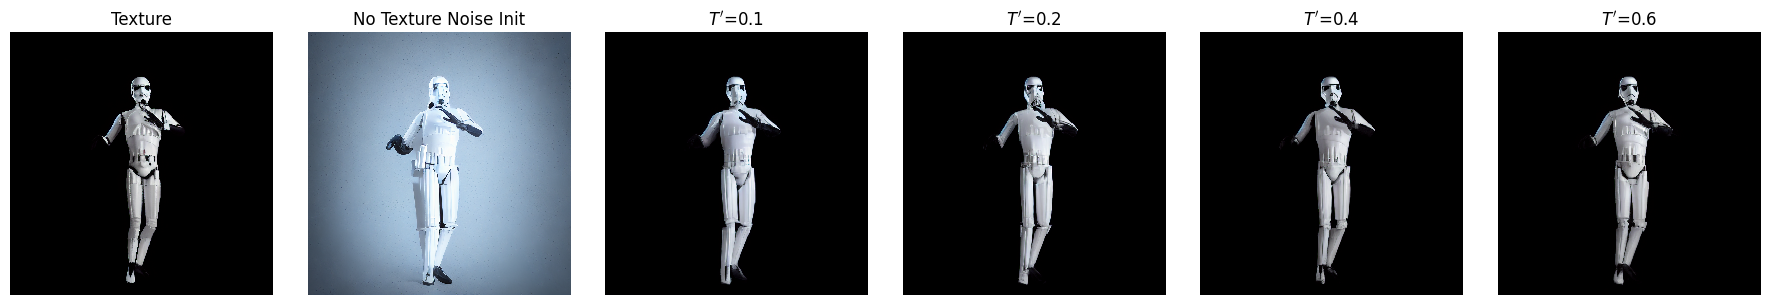

In [ ]:
from matplotlib import pyplot as plt
from text3d2video.utilities.ipython_utils import display_ims


frame_index = 1
ims = map_array(run_traces, lambda x: x.frames[frame_index], pbar=True)

def label_fun(run):
    config: RunGrTexConfig = OmegaConf.create(run.config)
    if not config.do_texture_noise_init:
        return "No Texture Noise Init"
    else:
        return f"$T'$={config.start_noise_level:.1f}"
    

texture_im = ims[-1]
fig_ims = [texture_im] + ims[0:-2].tolist()

im_labels = map_array(run_traces, label_fun, pbar=True)
im_labels = [im_labels[-1]] + im_labels[0:-2].tolist()
im_labels[0]= 'Texture'

fig, axs = display_ims(fig_ims, titles=im_labels, show=False)

# # for ax in axs:
# #     add_zoom_inset(ax, bbox_around_point([260, 70], 100))

plt.savefig("outs/noise_init_ablation.pdf", dpi=300, bbox_inches="tight")